<a href="https://colab.research.google.com/github/russellelliott/PythonChess/blob/main/Swapping_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Swapping Logic
This contains the logic for swapping the pieces.

Specifically, here is what's being swapped
- rows
- columns
- board cells

The algorith should adjust these situations:
- what if a swap puts the king in check, checkmate, or stalemate?
- what if a swap places pawns at their promotion ranks?
    - they are automatically promoted
    - queens are too powerful, so they will either be knight, bishop, or rook upon promotion

piece values: https://www.masterclass.com/articles/chess-piece-guide
1. Pawn: 1 point (or pawn)
2. Knight: 3 points
3. Bishop: 3 points
4. Rook: 5 points
5. Queen: 9 points


In [2]:
pip install CairoSVG

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 2.9 MB/s 
     |████████████████████████████████| 88 kB 6.0 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89668 sha256=344857f6c7ae59251bca6b1a9b9247c9470f239f8bd7c38e88ba5d2ffd8552fc
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfully built cairocffi


In [61]:
import chess
import chess.svg
from cairosvg import svg2png
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from more_itertools import run_length #for converting matrix to board

import random #for list shuffling, among other things

#display the board as a png on matplotlib
def displayBoard(board):
    svg = chess.svg.board(board, size=350) #make the svg
    #print(svg)
    svg2png(bytestring=svg,write_to='output.png') #convert to png
    img = mpimg.imread('output.png')
    imgplot = plt.imshow(img)
    plt.show() #show the png

#converting the board to a matrix
#using a class is a good idea?
class MyChess(chess.Board):
    size = 8 #dimensions of chess board
    mapped = {
    'P': 'wp',     # White Pawn
    'p': 'bp',    # Black Pawn
    'N': 'wn',     # White Knight
    'n': 'bn',    # Black Knight
    'B': 'wb',     # White Bishop
    'b': 'bb',    # Black Bishop
    'R': 'wr',     # White Rook
    'r': 'br',    # Black Rook
    'Q': 'wq',     # White Queen
    'q': 'bq',    # Black Queen
    'K': 'wk',     # White King
    'k': 'bk'     # Black King
    }

    empty = 'em'
    #convert the board FEN into a list
    def boardToList(self):
        epd_string = self.epd()
        list_int = []
        for i in epd_string:
            if i == " ":
                return list_int
            elif i != "/":
                if i in MyChess.mapped:
                    list_int.append(MyChess.mapped[i]) #add piece to matrix
                else:
                    for counter in range(0, int(i)):
                        list_int.append(MyChess.empty) #empty space
        return(list_int) #return the list made

    #convert the list into a matrix to make it easier to convert back to a board
    def listToMatrix(lst):
        size = MyChess.size
        #turn the list into matrix
        #https://java2blog.com/convert-list-to-matrix-python/
        matrix = []
        while lst != []:
            matrix.append(lst[:size])
            lst = lst[size:]
        #print(matrix)
        return(matrix) #return the matrix made
    
    #convert the matrix into a list
    def matrixToList(matrix):
        size = MyChess.size
        lst = []
        for row in range(size):
            for col in range(size):
                lst.append(matrix[row][col])
        
        return lst
    
    def shuffleBoard(board):
        boardList = MyChess.boardToList(board) #turn the board into a list

        #scramble the list
        #https://www.w3schools.com/python/ref_random_shuffle.asp
        random.shuffle(boardList)
        boardMatrix = MyChess.listToMatrix(boardList) #turn the new list into a matrix
        newBoard = MyChess.matrixToBoard(boardMatrix)
        return newBoard


    
    #bk = black king
    #wk = white king
    #em = empty
    #spaces: color, type
    def convert_cell(value):
        if value == 'em':
            return None
        else:
            color, piece = value
            return piece.upper() if color == 'w' else piece.lower()


    def convert_rank(rank):
        return ''.join(
            value * count if value else str(count)
            for value, count in run_length.encode(map(MyChess.convert_cell, rank))
        )


    def fen_from_board(board):
        return '/'.join(map(MyChess.convert_rank, board)) + ' w KQkq - 0 1'
    
    def matrixToBoard(matrix):
        result = MyChess.fen_from_board(matrix) #get the FEN from the board matrix
        #print(result)
        newBoard = chess.Board(result) #get the resulting board from that FEN
        #print(result)
        #displayBoard(newBoard) #display the board
        return newBoard

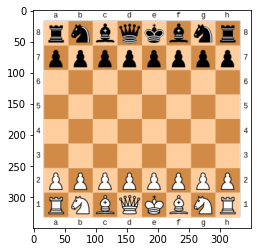

[['br', 'bn', 'bb', 'bq', 'bk', 'bb', 'bn', 'br'], ['bp', 'bp', 'bp', 'bp', 'bp', 'bp', 'bp', 'bp'], ['em', 'em', 'em', 'em', 'em', 'em', 'em', 'em'], ['em', 'em', 'em', 'em', 'em', 'em', 'em', 'em'], ['em', 'em', 'em', 'em', 'em', 'em', 'em', 'em'], ['em', 'em', 'em', 'em', 'em', 'em', 'em', 'em'], ['wp', 'wp', 'wp', 'wp', 'wp', 'wp', 'wp', 'wp'], ['wr', 'wn', 'wb', 'wq', 'wk', 'wb', 'wn', 'wr']]
k7/1n1R1P2/r1p2nN1/2ppp1Pp/pp1pN1P1/8/3K4/8 w KQkq - 0 1
k7/1n1R1P2/r1p2nN1/2ppp1Pp/pp1pN1P1/8/3K4/8 w KQkq - 0 1


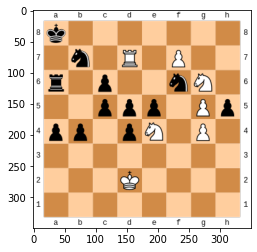

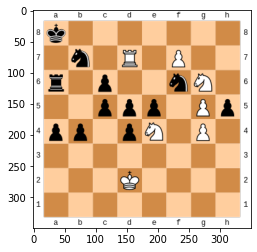

In [60]:
board = chess.Board()
displayBoard(board)

#MyChess.listToMatrix(): convert list to matrix
#MyChess.boardToList(board): convert board to a list of strings
myBoard = MyChess.listToMatrix(MyChess.boardToList(board)) #turn the board into a matrix
print(myBoard)

#convert matrix to board
boardMatrix = [
    ['bk', 'em', 'em', 'em', 'em', 'em', 'em', 'em'],
    ['em', 'bn', 'em', 'wr', 'em', 'wp', 'em', 'em'],
    ['br', 'em', 'bp', 'em', 'em', 'bn', 'wn', 'em'],
    ['em', 'em', 'bp', 'bp', 'bp', 'em', 'wp', 'bp'],
    ['bp', 'bp', 'em', 'bp', 'wn', 'em', 'wp', 'em'],
    ['em', 'em', 'em', 'em', 'em', 'em', 'em', 'em'],
    ['em', 'em', 'em', 'wk', 'em', 'em', 'em', 'em'],
    ['em', 'em', 'em', 'em', 'em', 'em', 'em', 'em'],
]
result = MyChess.fen_from_board(boardMatrix) #get the FEN from the board matrix
print(result)
newBoard = chess.Board(result) #get the resulting board from that FEN
print(result)
displayBoard(newBoard) #display the board

board2 = MyChess.matrixToBoard(boardMatrix)
displayBoard(board2)

Swapping Logic
- input: board
- output: board

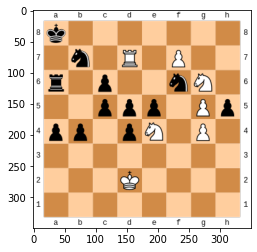

columns 0 and 7 have been swapped
after


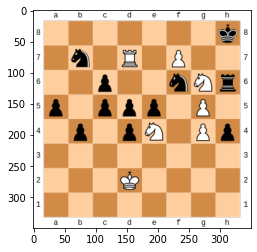

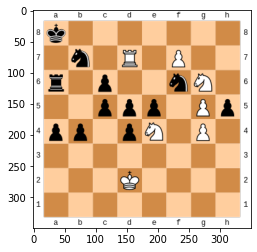

rows 0 and 7 have been swapped
after


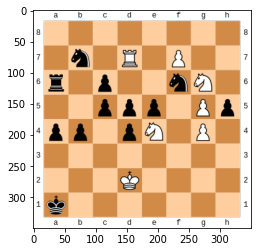

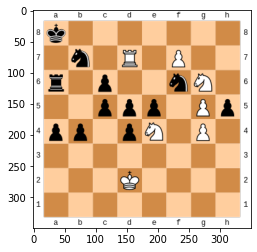

cells [0,0] and [7,7] have been swapped
after


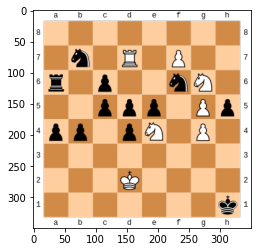

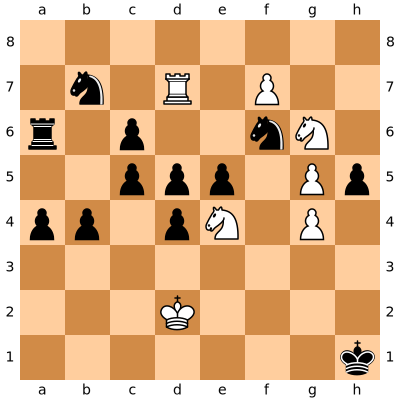

In [57]:
#function to perform the swapping actions (row and col)
#board = chess Board object
#action = the thing being swapped
#a = row/col a
#b = row/col b
def swap(board, action, a, b):
    displayBoard(board)
    myBoard = MyChess.listToMatrix(MyChess.boardToList(board)) #turn the board into a matrix

    #swapping logic

    #swap rows
    if action == "rows":
        myBoard[a], myBoard[b] = myBoard[b], myBoard[a] #swap rows a and b

    #swap columns
    elif action == "columns":
        for row in myBoard: #iterate through myBoard, with i being a row
            row[a], row[b] = row[b], row[a] #for each row, swap cells a and b
    
    else:
        print("invalid action. doing nothing.")
        return board
    
    finished = MyChess.matrixToBoard(myBoard) #turn matrix back to a board
    #convert the matrix into a board
    print("{:s} {:n} and {:n} have been swapped".format(action, a, b))
    print("after")
    displayBoard(finished)
    return finished #this causes the svg to display on google colab. this is normal.

#swap cells [r1, c1] and [r2, c2]
#board = chess Board object
def swapCells(board, r1, c1, r2, c2):
    displayBoard(board)
    myBoard = MyChess.listToMatrix(MyChess.boardToList(board)) #turn the board into a matrix

    #swapping logic
    myBoard[r1][c1], myBoard[r2][c2] = myBoard[r2][c2], myBoard[r1][c1]

    finished = MyChess.matrixToBoard(myBoard) #turn matrix back to a board
    #convert the matrix into a board
    print("{:s} [{:n},{:n}] and [{:n},{:n}] have been swapped".format("cells", r1, c1, r2, c2))
    print("after")
    displayBoard(finished)
    return finished #this causes the svg to display on google colab. this is normal.


'''#swap columns a and b. columns are a-h, represented as 0-7
def swapCols(board, a, b):
    print("before")
    displayBoard(board)
    myBoard = MyChess.listToMatrix(MyChess.convert_to_int(board)) #turn the board into a matrix
    for row in myBoard: #iterate through myBoard, with i being a row
        row[a], row[b] = row[b], row[a] #for each row, swap cells a and b
    finished = MyChess.matrixToBoard(myBoard)
    #convert the matrix into a board
    print("Columns {:n} and {:n} have been swapped".format(a, b))
    print("after")
    displayBoard(finished)
    return finished

#swap rows a and b. columns are 1-8 represented as 0-7
def swapRows(board, a, b):
    print("before")
    displayBoard(board)
    myBoard = MyChess.listToMatrix(MyChess.convert_to_int(board)) #turn the board into a matrix
    myBoard[a], myBoard[b] = myBoard[b], myBoard[a] #swap rows a and b
    finished = MyChess.matrixToBoard(myBoard)
    #convert the matrix into a board
    print("Rows {:n} and {:n} have been swapped".format(a, b))
    print("after")
    displayBoard(finished)
    return finished
'''

    

startBoard = chess.Board("k7/1n1R1P2/r1p2nN1/2ppp1Pp/pp1pN1P1/8/3K4/8 w KQkq - 0 1")
#swapCols(startBoard, 0, 7)
swap(startBoard, "columns", 0, 7) #swap columns a and h
swap(startBoard, "rows", 0, 7) #swap columns 1 and 8

swapCells(startBoard, 0, 0, 7, 7) #swap cells a8 and h1

Testing out board shuffling

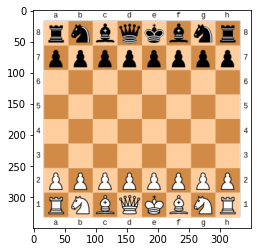

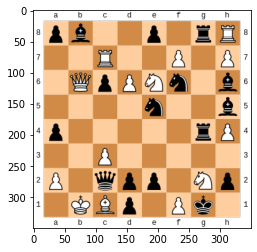

b1c2
made the move


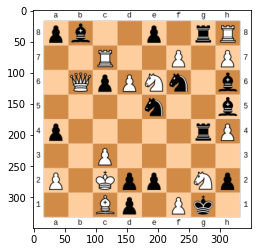

In [78]:
standard = chess.Board()
displayBoard(standard)
shuffled = MyChess.shuffleBoard(board)
displayBoard(shuffled)

#can a piece move at this point?
#make random legal move https://jupyter.brynmawr.edu/services/public/dblank/CS371%20Cognitive%20Science/2016-Fall/Programming%20a%20Chess%20Player.ipynb
def randomMove(board):
    move = random.choice(list(board.legal_moves))
    return move

move = randomMove(shuffled)
print(move)
try:
    shuffled.push(move) #push the move
    print("made the move")
    displayBoard(shuffled)
except:
    print("No legal moves")
#game can play as normal